In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
url = "https://github.com/ageron/handson-ml2/blob/master/datasets/housing/housing.csv?raw=true"
df = pd.read_csv(url)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df.shape

(20640, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

<AxesSubplot:xlabel='ocean_proximity', ylabel='count'>

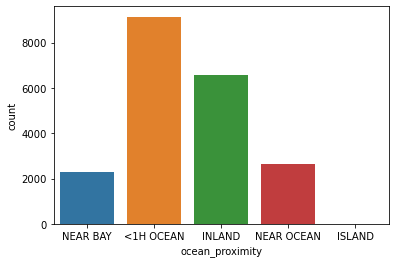

In [6]:
sns.countplot(x=df['ocean_proximity'])

In [7]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


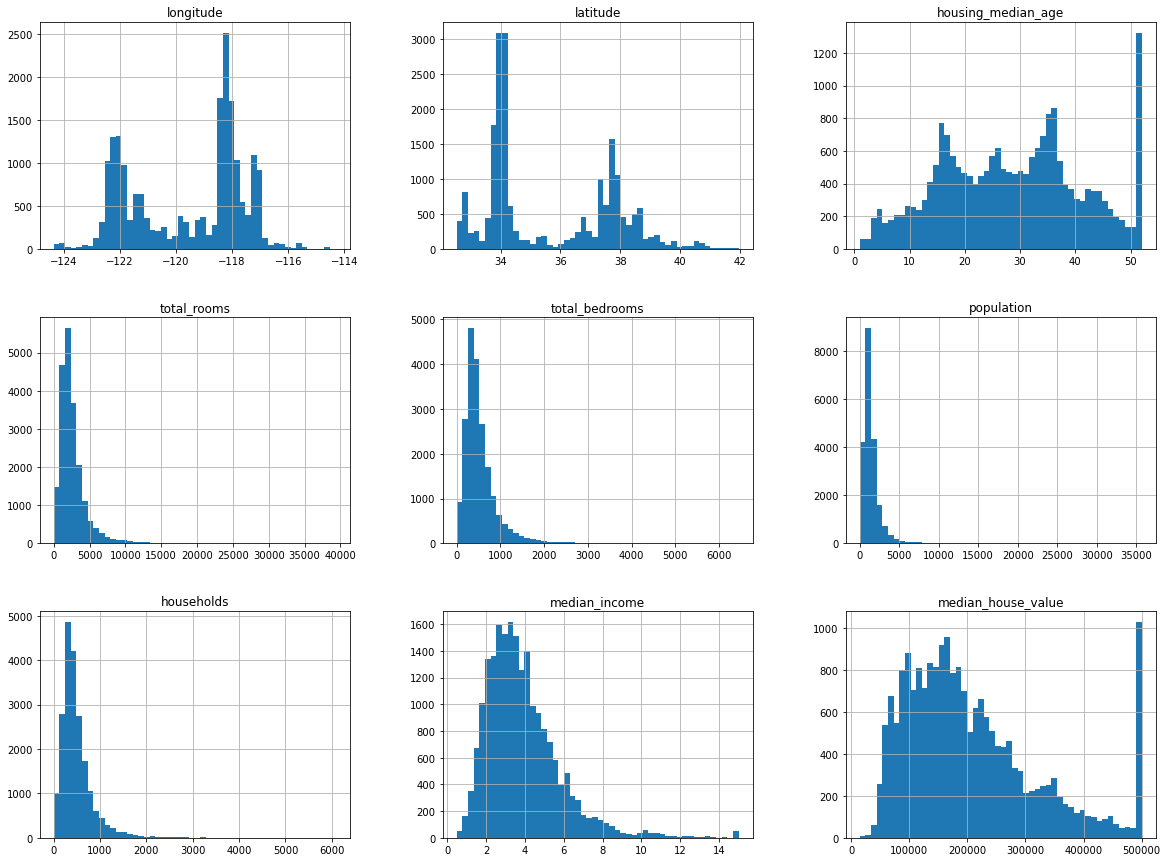

In [8]:
%matplotlib inline
df.hist(bins=50, figsize=(20,15))
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
train_set, test_set= train_test_split(df, test_size=0.2, random_state=42)

In [10]:
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND


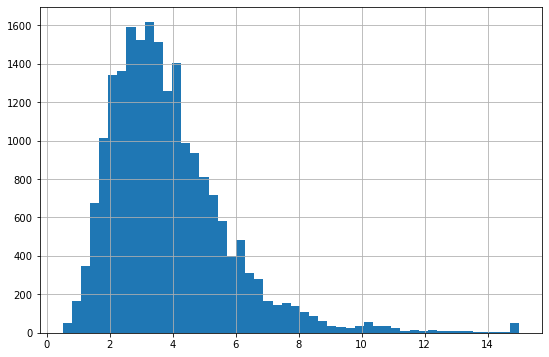

In [11]:
%matplotlib inline
df['median_income'].hist(bins=50, figsize=(9,6))
plt.show()

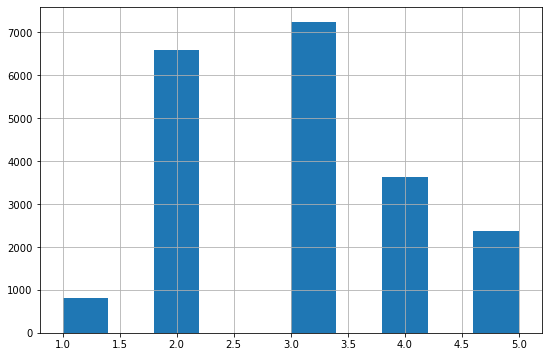

In [12]:
df['income_cat'] = pd.cut(df['median_income'], bins=[0., 1.5, 3.0, 4.5, 6.0, np.inf], labels=[1,2,3,4,5])
df['income_cat'].hist(figsize=(9,6))
plt.show()

In [13]:
df.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
14117,-117.11,32.73,34.0,1096.0,221.0,574.0,223.0,3.8355,126700.0,NEAR OCEAN,3
572,-122.25,37.76,52.0,2876.0,648.0,1340.0,632.0,3.5670,252900.0,NEAR BAY,3
1912,-120.16,39.01,16.0,1463.0,264.0,54.0,26.0,4.9750,206300.0,INLAND,4
387,-122.29,37.89,52.0,2248.0,422.0,870.0,377.0,3.4732,246200.0,NEAR BAY,3
10220,-117.88,33.88,15.0,957.0,360.0,615.0,370.0,3.0263,162500.0,<1H OCEAN,3


In [14]:
from sklearn.model_selection import StratifiedShuffleSplit
stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in stratified_split.split(df,df['income_cat']):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [15]:
strat_train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,2
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,5
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,2
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND,2
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN,3
...,...,...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,240200.0,INLAND,4
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,113000.0,INLAND,2
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,97800.0,INLAND,3
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,225900.0,<1H OCEAN,3


In [16]:
housing = strat_train_set.copy()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,2
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,5
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,2
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND,2
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN,3


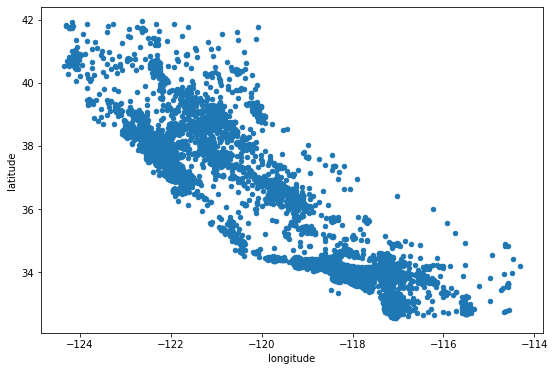

In [17]:
housing.plot(kind='scatter', x='longitude', y='latitude', figsize=(9,6))
plt.show()

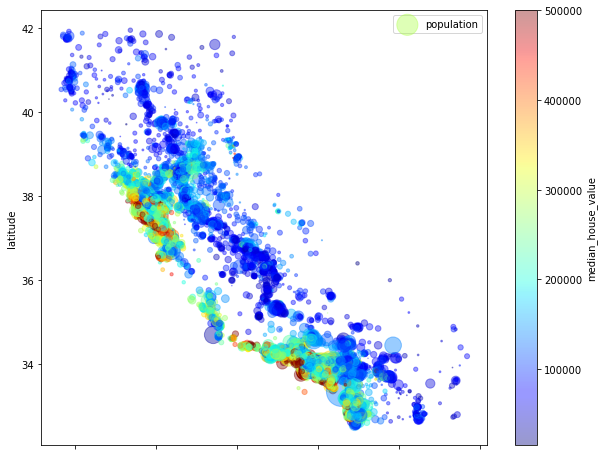

In [18]:
housing.plot(
    kind="scatter", 
    x="longitude", 
    y="latitude", 
    alpha=0.4,
    s=housing['population']/40, # nuqta radiusi aholi soniga qarab o'zgaradi
    label="population",
    c="median_house_value", # nuqta rangi uyning median narxiga qarab o'zgaradi
    cmap="jet", # ranglar. Ko'k - daromadi kam, qizil - daromadi ko'p
    colorbar=True,
    figsize=(10,8)
)
plt.show()

In [19]:
housing.corrwith(housing['median_house_value']).sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
dtype: float64

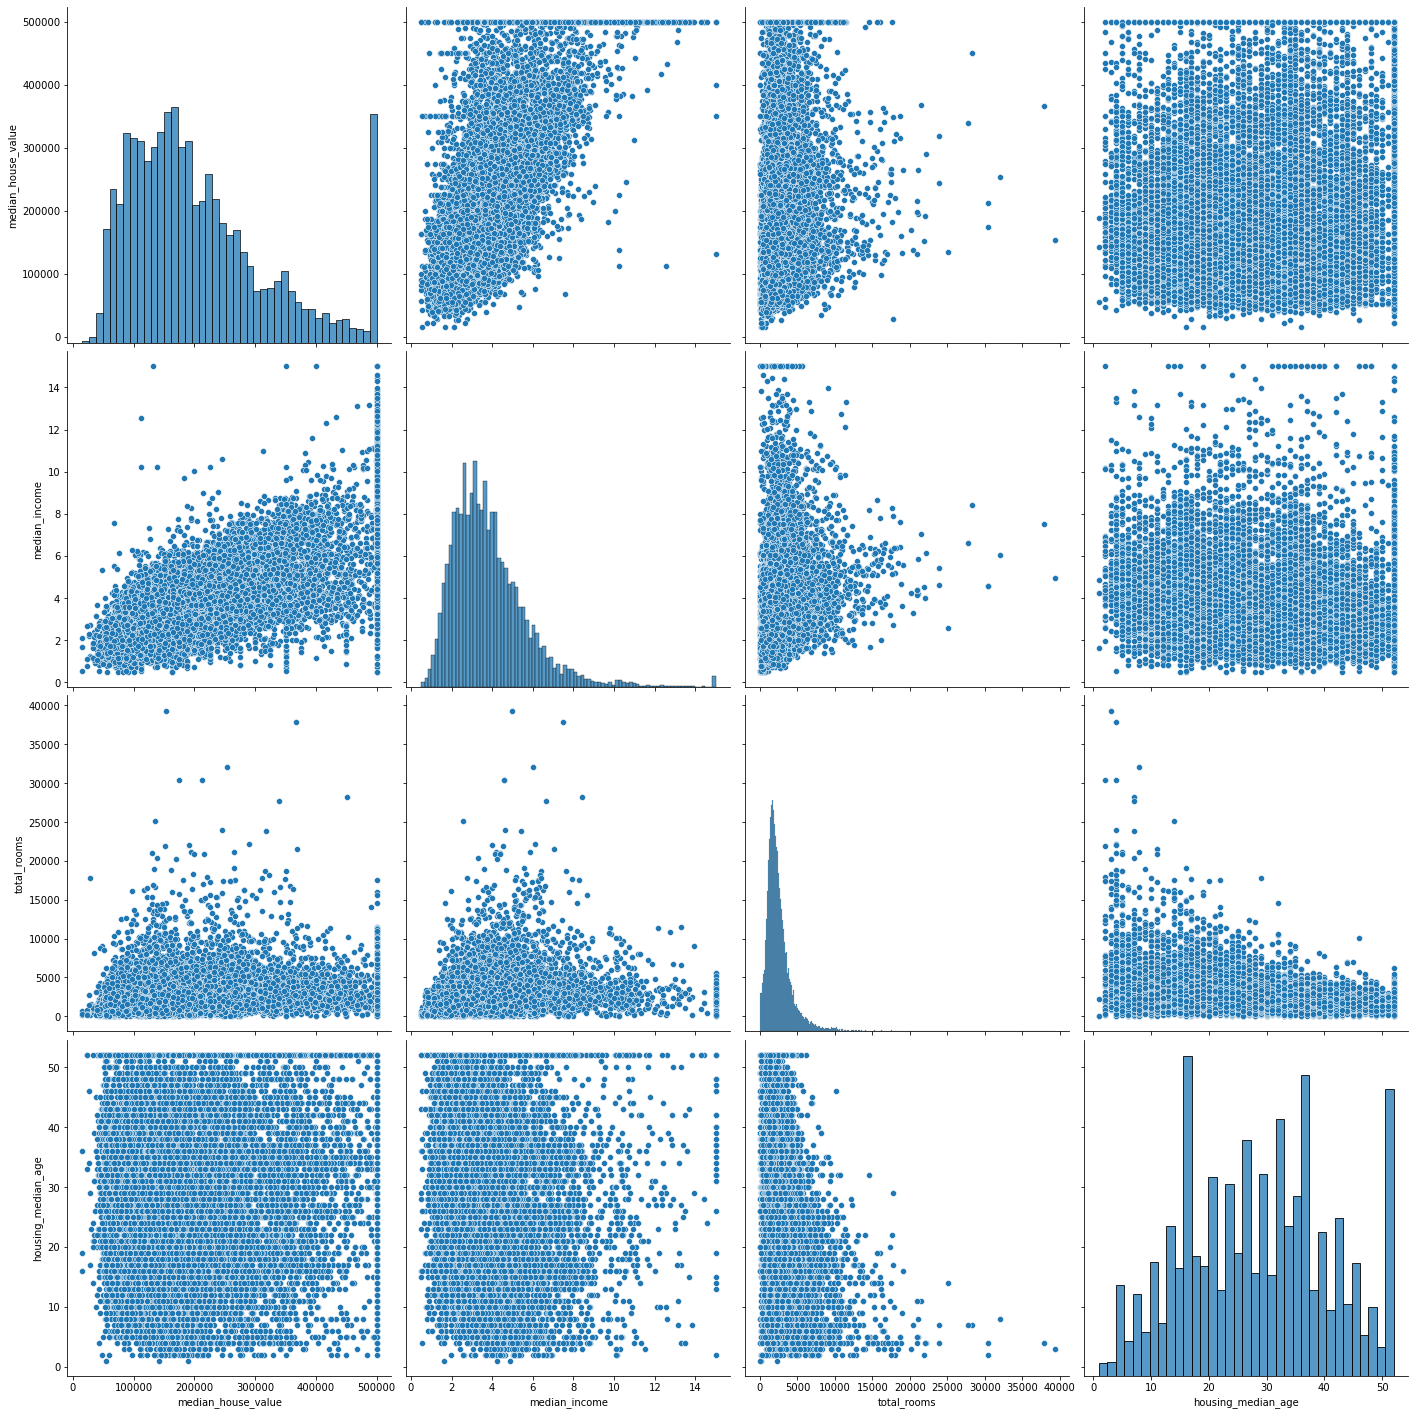

In [20]:
cols = ['median_house_value', 'median_income', 'total_rooms','housing_median_age']
sns.pairplot(housing[cols], height=5)
plt.show()

In [21]:
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['populaton_per_household'] = housing['population']/housing['households']

In [22]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat,rooms_per_household,bedrooms_per_room,populaton_per_household
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,2,4.625369,0.223852,2.094395
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,5,6.008850,0.159057,2.707965
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,2,4.225108,0.241291,2.025974
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND,2,5.232295,0.200866,4.135977
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN,3,4.505810,0.231341,3.047847


In [23]:
housing.corrwith(housing['median_house_value']).sort_values(ascending=False)

median_house_value         1.000000
median_income              0.687160
rooms_per_household        0.146285
total_rooms                0.135097
housing_median_age         0.114110
households                 0.064506
total_bedrooms             0.047689
populaton_per_household   -0.021985
population                -0.026920
longitude                 -0.047432
latitude                  -0.142724
bedrooms_per_room         -0.259984
dtype: float64

In [24]:
#################
# MALUMOTLARNI "" ML"".  UCHUN TAYYORLASH

In [25]:
import pandas as pd
import numpy as np
import sklearn

In [26]:
url = "https://github.com/ageron/handson-ml2/blob/master/datasets/housing/housing.csv?raw=true"
df = pd.read_csv(url)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [27]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)


In [28]:
housing = train_set.drop('median_income', axis=1)
housin_labels = train_set['median_income'].copy()

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [30]:
housing_num = housing.drop('ocean_proximity', axis=1)
housing_num

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_house_value
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,103000.0
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,382100.0
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,172600.0
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,93400.0
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,96500.0
...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,229200.0
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,97800.0
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,222100.0
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,283500.0


In [31]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

In [32]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [33]:
imputer.statistics_

array([-1.1851e+02,  3.4260e+01,  2.9000e+01,  2.1290e+03,  4.3700e+02,
        1.1670e+03,  4.1000e+02,  1.7985e+05])

In [34]:
x = imputer.transform(housing_num)
x

array([[-1.1703e+02,  3.2710e+01,  3.3000e+01, ...,  2.3000e+03,
         6.2300e+02,  1.0300e+05],
       [-1.1816e+02,  3.3770e+01,  4.9000e+01, ...,  1.3140e+03,
         7.5600e+02,  3.8210e+05],
       [-1.2048e+02,  3.4660e+01,  4.0000e+00, ...,  9.1500e+02,
         3.3600e+02,  1.7260e+05],
       ...,
       [-1.1838e+02,  3.4030e+01,  3.6000e+01, ...,  1.7560e+03,
         5.2700e+02,  2.2210e+05],
       [-1.2196e+02,  3.7580e+01,  1.5000e+01, ...,  1.7770e+03,
         5.5900e+02,  2.8350e+05],
       [-1.2242e+02,  3.7770e+01,  5.2000e+01, ...,  2.6190e+03,
         1.2420e+03,  3.2500e+05]])

In [35]:
type(x)

numpy.ndarray

In [36]:
imputer.fit_transform(housing_num)

array([[-1.1703e+02,  3.2710e+01,  3.3000e+01, ...,  2.3000e+03,
         6.2300e+02,  1.0300e+05],
       [-1.1816e+02,  3.3770e+01,  4.9000e+01, ...,  1.3140e+03,
         7.5600e+02,  3.8210e+05],
       [-1.2048e+02,  3.4660e+01,  4.0000e+00, ...,  9.1500e+02,
         3.3600e+02,  1.7260e+05],
       ...,
       [-1.1838e+02,  3.4030e+01,  3.6000e+01, ...,  1.7560e+03,
         5.2700e+02,  2.2210e+05],
       [-1.2196e+02,  3.7580e+01,  1.5000e+01, ...,  1.7770e+03,
         5.5900e+02,  2.8350e+05],
       [-1.2242e+02,  3.7770e+01,  5.2000e+01, ...,  2.6190e+03,
         1.2420e+03,  3.2500e+05]])

In [37]:
housing_tr = pd.DataFrame(x,  columns = housing_num.columns, index = housing_num.index)
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_house_value
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,103000.0
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,382100.0
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,172600.0
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,93400.0
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,96500.0
...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,229200.0
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,97800.0
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,222100.0
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,283500.0


In [38]:
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 14196 to 15795
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_house_value  16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


In [39]:
housing_cat = housing[['ocean_proximity']]
housing_cat

,ocean_proximity
14196,NEAR OCEAN
8267,NEAR OCEAN
17445,NEAR OCEAN
14265,NEAR OCEAN
2271,INLAND
...,...
11284,<1H OCEAN
11964,INLAND
5390,<1H OCEAN
860,<1H OCEAN


In [40]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()

housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded

array([[4.],
       [4.],
       [4.],
       ...,
       [0.],
       [0.],
       [3.]])

In [41]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()

housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot.toarray()

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [42]:
########

In [43]:
from sklearn.base import BaseEstimator, TransformerMixin

#bizga kerakli ustunlar
rooms_ix, bedrooms_ix, population_ix,households_ix = 3,4,5,6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self,x, y=None):
        return self # bu funksiya faqat transformer. estimator emas
    def transform(self,x):
        rooms_per_household = x[:, rooms_ix]/x[:,households_ix]
        population_per_household = x[:,population_ix]/x[:,households_ix]
        if self.add_bedrooms_per_room: # bu ixtiyoriy ustun boladi
            bedrooms_per_room = x[:, bedrooms_ix]/x[:, rooms_ix]
            return np.c_[x, rooms_per_household,  population_per_household, bedrooms_per_room]
        else:
            return np.c_[x, rooms_per_household,  population_per_household]

In [44]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=True)
housing_extra_attribs = attr_adder.transform(housing.values)   # values qilsak aray qaytaradi
housing_extra_attribs[0,:]

array([-117.03, 32.71, 33.0, 3126.0, 627.0, 2300.0, 623.0, 103000.0,
       'NEAR OCEAN', 5.017656500802568, 3.691813804173355,
       0.20057581573896352], dtype=object)

In [45]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_house_value
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.582290,35.643149,28.608285,2642.004784,538.496851,1426.453004,499.986919,207194.693738
std,2.005654,2.136665,12.602499,2174.646744,419.007096,1137.056380,380.967964,115622.626448
min,-124.350000,32.550000,1.000000,2.000000,1.000000,3.000000,1.000000,14999.000000
25%,-121.810000,33.930000,18.000000,1454.000000,296.750000,789.000000,280.000000,119800.000000
50%,-118.510000,34.260000,29.000000,2129.000000,437.000000,1167.000000,410.000000,179850.000000
75%,-118.010000,37.720000,37.000000,3160.000000,647.000000,1726.000000,606.000000,265125.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,500001.000000


In [46]:
housing_num.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_house_value
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,103000.0
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,382100.0
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,172600.0
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,93400.0
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,96500.0


In [47]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()

min_max_scaler.fit_transform(housing_num)

array([[0.72908367, 0.01702128, 0.62745098, ..., 0.06437961, 0.10228581,
        0.18144461],
       [0.61653386, 0.12978723, 0.94117647, ..., 0.0367443 , 0.12415721,
        0.75690616],
       [0.38545817, 0.22446809, 0.05882353, ..., 0.02556125, 0.05508962,
        0.32494918],
       ...,
       [0.59462151, 0.15744681, 0.68627451, ..., 0.04913254, 0.08649893,
        0.42701061],
       [0.23804781, 0.53510638, 0.2745098 , ..., 0.04972112, 0.09176122,
        0.55360803],
       [0.19223108, 0.55531915, 1.        , ..., 0.07332044, 0.20407828,
        0.63917468]])

In [48]:
from sklearn.preprocessing import StandardScaler

standart_scaler = StandardScaler()

standart_scaler.fit_transform(housing_num)

array([[ 1.27258656, -1.3728112 ,  0.34849025, ...,  0.76827628,
         0.32290591, -0.90118909],
       [ 0.70916212, -0.87669601,  1.61811813, ..., -0.09890135,
         0.6720272 ,  1.5127714 ],
       [-0.44760309, -0.46014647, -1.95271028, ..., -0.44981806,
        -0.43046109, -0.29921255],
       ...,
       [ 0.59946887, -0.75500738,  0.58654547, ...,  0.28983345,
         0.07090859,  0.12891731],
       [-1.18553953,  0.90651045, -1.07984112, ...,  0.30830275,
         0.15490769,  0.65997132],
       [-1.41489815,  0.99543676,  1.85617335, ...,  1.04883375,
         1.94776365,  1.01890847]])